# Nuke Demographics Results
### Data Analysis by: Luke Barousse
### Data Provided by: The Reactor is Critical

In [230]:
# install necessary packages and download data
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
figsize=(10,10)
dpi=80

df = pd.read_csv('Nuke Demographic Survey.csv', index_col=0)

#### Basic Statistics

In [81]:
print("For this analysis there were {} observations in total.".format(df.shape[0]))

print("Demographic of gender: {} females, {} males, and {} that prefered not to answer.".format(df.Gender.value_counts()['Female'], df.Gender.value_counts()['Male'], df.Gender.value_counts()['Prefer not to answer']))

gender = [df.Gender.value_counts()['Female'], df.Gender.value_counts()['Male'], df.Gender.value_counts()['Prefer not to answer']]

For this analysis there were 2284 observations in total.
Demographic of gender: 271 females, 1989 males, and 6 that prefered not to answer.


In [82]:
print("Demograhic of enlisted or officer: {} enlisted and {} officers.".format(df.Enlisted_Officer.value_counts()['Enlisted'], df.Enlisted_Officer.value_counts()['Officer']))

enlisted_officer = [df.Enlisted_Officer.value_counts()['Enlisted'], df.Enlisted_Officer.value_counts()['Officer']]

Demograhic of enlisted or officer: 2123 enlisted and 154 officers.


In [83]:
df.gender_enlisted = df.Gender + df.Enlisted_Officer
df.gender_enlisted.head()

gender_enlisted = [df.gender_enlisted.value_counts()['FemaleEnlisted'], 
                df.gender_enlisted.value_counts()['MaleEnlisted'],
                df.gender_enlisted.value_counts()['FemaleOfficer'],
                df.gender_enlisted.value_counts()['MaleOfficer']]

plt.figure(figsize=figsize, dpi=dpi)
plt.pie(gender_enlisted,labels = labels , autopct='%1.0f%%',)
plt.tight_layout()
plt.show

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


NameError: name 'labels' is not defined

<Figure size 800x560 with 0 Axes>

#### How did you meet your recruiter?

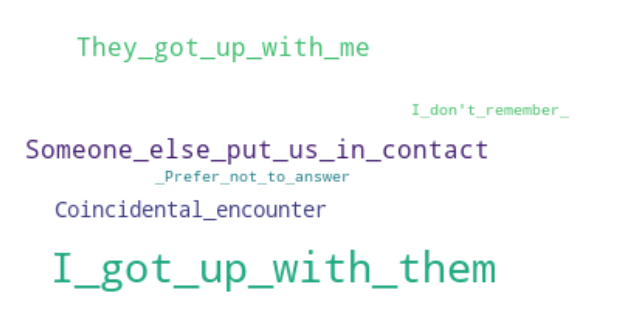

In [84]:
#connect phrases that have a space
meet_recruiter_nospace = [str(word).replace(' ','_') for word in df.Meet_Recruiter]
#collect all words
meet_recruiter_all = " ".join(words for words in meet_recruiter_nospace)
stopwords = set(STOPWORDS)
stopwords.add("nan")
wc_recruiter = WordCloud(background_color="white", collocations=False, prefer_horizontal=1, stopwords=stopwords ).generate(meet_recruiter_all)
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(wc_recruiter, interpolation='bilinear')
plt.axis("off")
plt.show()

#### What was your primary motivation for joining the military?

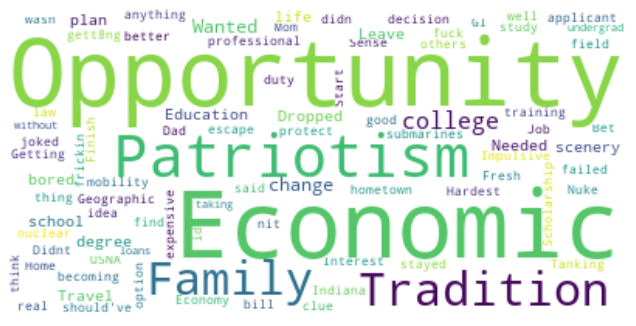

In [85]:
#connect phrases that have a space
join_motivation_nospace = [str(word).replace(' ','~') for word in df.Join_Motivation]
stopwords = set(STOPWORDS)
stopwords.add("Prefer")
stopwords.add("answer")
stopwords.add("Other")
stopwords.add("nan")
join_motivation_all = " ".join(words for words in join_motivation_nospace)
wc_join = WordCloud(background_color="white", collocations=False, stopwords=stopwords).generate(join_motivation_all)
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(wc_join, interpolation='bilinear')
plt.axis("off")
plt.show()

#### What year did you join?

Text(0.5, 0, 'Year Joined NNPP')

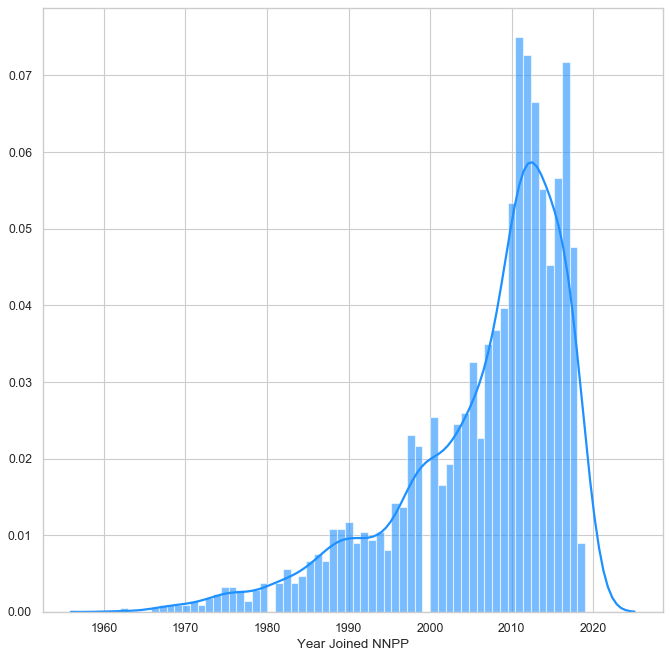

In [231]:
import seaborn as sns
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=figsize, dpi=dpi)
df.Year_Joined = pd.to_numeric(df.Year_Joined)
sns.distplot(df.Year_Joined, bins=60, color="dodgerblue",  **kwargs)
plt.xlabel('Year Joined NNPP')

#### At what age did you join the Naval Nuclear Propulsion Program (NNPP)?

Text(0.5, 0, 'Age Joined NNPP')

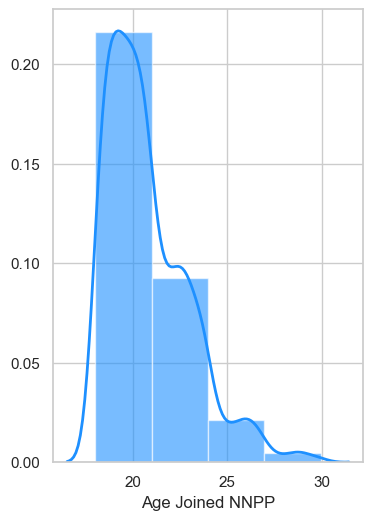

In [323]:
import random
#assigning a random number in age group to assign numerical values to age
def age(x):  
    if "18-20" in x:
        return random.uniform(18,21)
    elif "21-23" in x:
        return random.uniform(21,24)
    elif "24-26" in x:
        return random.uniform(24,27)
    elif "27+" in x:
        return random.uniform(27,30)
    else: return

df.Age_Joined.fillna('')
df['Age_Number'] = df.Age_Joined.apply(age)

plt.figure(figsize=figsize, dpi=dpi)
sns.distplot(df.Age_Number, bins=4, color="dodgerblue",  **kwargs)
plt.xlabel('Age Joined NNPP')

#### Inferred birth year based on the year and age joined NNPP

Text(0.5, 0, 'Birth Year')

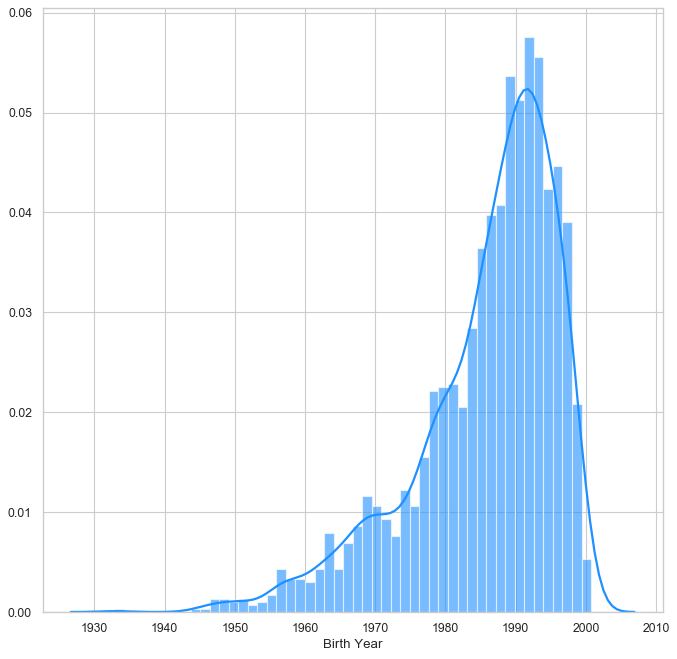

In [233]:
df['Birth_Year'] = df.Year_Joined - df.Age_Number

plt.figure(figsize=figsize, dpi=dpi)
sns.distplot(df.Birth_Year, bins=50, color="dodgerblue",  **kwargs)
plt.xlabel('Birth Year')

#### How many years did you serve?

Text(0.5, 0, 'Years of Service')

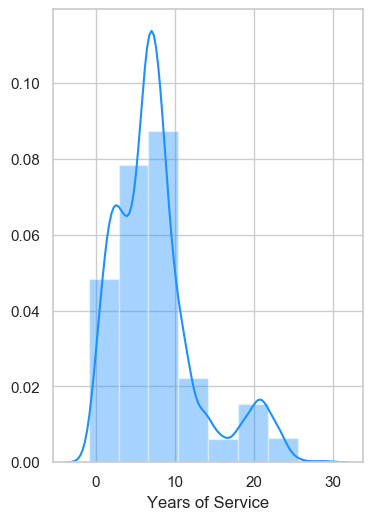

In [322]:
from datetime import datetime
currentYear = datetime.now().year

def yr_service(row):
    x = row.Years_Service
    y = row.Year_Joined
    CurSrvYrs = currentYear - random.uniform(y, y+1) #creates jitter
    if "Currently Serving" in x:
        return CurSrvYrs
    elif "Less than 6" in x:
        return min(CurSrvYrs, random.uniform(2,6))  #picked 4 based on minimum nuke contract
    elif "6 to 8 years" in x:
        return min(CurSrvYrs, random.uniform(6,9))
    elif "9 to 11 years" in x:
        return min(CurSrvYrs, random.uniform(9,12))
    elif "12 to 14 years" in x:
        return min(CurSrvYrs, random.uniform(12,15))
    elif "15 to 17 years" in x:
        return min(CurSrvYrs, random.uniform(15,18))
    elif "18 to 20 years" in x:
        return min(CurSrvYrs, random.uniform(18,20))
    elif "Greater than 20 years" in x:
        return min(CurSrvYrs, random.uniform(20,24))  #arbritrailly picked 24...
    else: return
    
df.Years_Service.fillna('')
df['YrSvc'] = df.apply(lambda row: yr_service(row), axis=1)

plt.figure(figsize=figsize, dpi=dpi)
sns.distplot(df.YrSvc, bins=8, color="dodgerblue")
plt.xlabel('Years of Service')

#### Financial Status vs Education Level for various categories

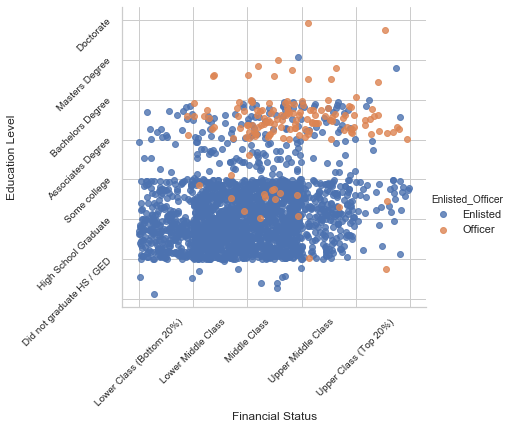

In [325]:
def ed_level(x):
    if "Did not graduate high school / GED" in x:
        return random.uniform(0,1)
    elif "Completed High School" in x:
        return random.uniform(1,2)
    elif "Some College" in x or "Some college" in x:
        return random.uniform(2,3)
    elif "2 Year Degree" in x or "2 year degree" in x:
        return random.uniform(3,4)
    elif "4 Year Degree" in x or "4 year degree" in x:
        return random.uniform(4,5)
    elif "Master's Degree" in x or "Master's degree" in x:
        return random.uniform(5,6)
    elif "Doctorate" in x:
        return random.uniform(6,7)
    else: return

df.Education_Level.fillna('')
df['EdCat'] = df.Education_Level.apply(ed_level)

df.Parents_Ed_Level.fillna('')
df['Parent_Ed_Level_Cat'] = df.Parents_Ed_Level.apply(ed_level)

EdCatLabels = ("", "", "Did not graduate HS / GED", "High School Graduate", "Some college",
                "Associates Degree", "Bachelors Degree", "Masters Degree", "Doctorate")

def fin_status(x):
    if "Prefer not to answer" in x:
        return
    elif "Lower Class (Bottom 20%)" in x:
        return random.uniform(0,1)
    elif "Lower Middle Class" in x:
        return random.uniform(1,2)
    elif "Upper Middle Class" in x:
        return random.uniform(3,4)
    elif "Middle Class" in x:
        return random.uniform(2,3)
    elif "Upper Class (Top 20%)" in x:
        return random.uniform(4,5)
    else: return
    
df.Financial_Status.fillna('')
df['FinCat'] = df.Financial_Status.apply(fin_status)

FinCatLabels = ("", "Lower Class (Bottom 20%)", "Lower Middle Class", 
                "Middle Class", "Upper Middle Class", "Upper Class (Top 20%)")

def EdvFin(groupby):
    Enl_Off = df.groupby(groupby)
    ax = sns.lmplot('FinCat', 'EdCat', data=df, fit_reg=False, hue=groupby)
    ax.set_xticklabels(FinCatLabels, rotation=45, fontsize=10)
    ax.set_yticklabels(EdCatLabels, rotation=45, fontsize=10)
    plt.xlabel('Financial Status')
    plt.ylabel('Education Level')
    return plt.show()

EdvFin('Enlisted_Officer')


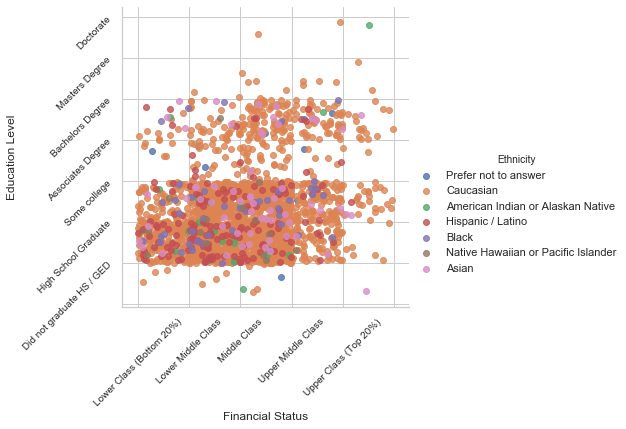

In [237]:
EdvFin('Ethnicity') #Minorities near lower left quadrant, caucasians spread evenly

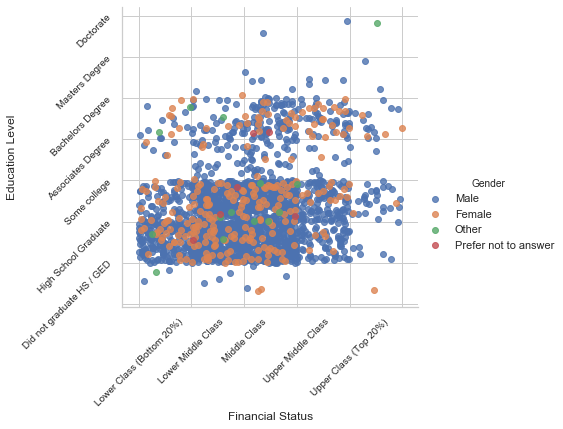

In [238]:
EdvFin('Gender')  #No Real Insights

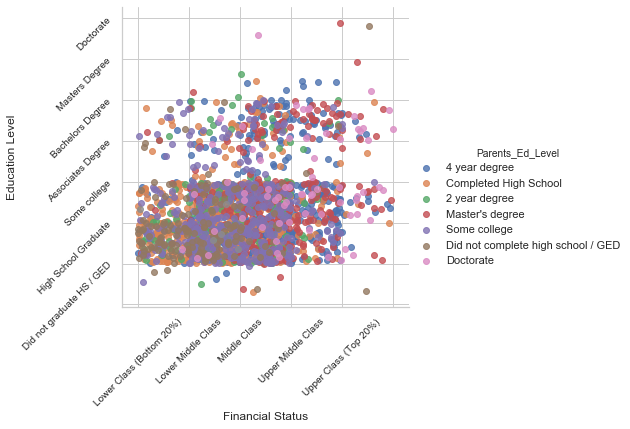

In [239]:
EdvFin('Parents_Ed_Level')

#### Education Level vs Years of Service

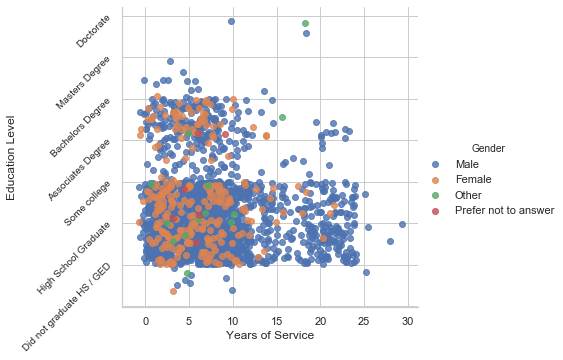

In [246]:
ax = sns.lmplot('YrSvc', 'EdCat', data=df, fit_reg=False, hue='Gender')
#ax.set_xticklabels(YrSvc, rotation=45, fontsize=10)
ax.set_yticklabels(EdCatLabels, rotation=45, fontsize=10)
plt.xlabel('Years of Service')
plt.ylabel('Education Level')
plt.show()

#### Year Joined vs Age Joined

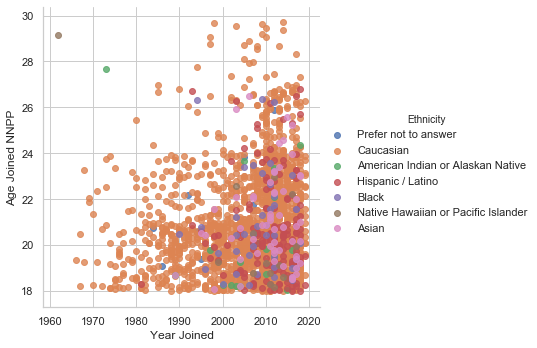

In [240]:
def TimePeriodChange(yaxis, ylabel, cat):
    ax = sns.lmplot('Year_Joined', yaxis, data=df, fit_reg=False, hue=cat)
    plt.xlabel('Year Joined')
    plt.ylabel(ylabel)
    return plt.show()

TimePeriodChange('Age_Number', 'Age Joined NNPP', 'Ethnicity')

#### Year Joined vs Years of Service for various categories

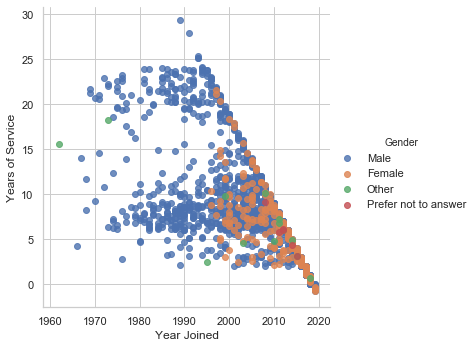

In [241]:
TimePeriodChange('YrSvc', 'Years of Service', 'Gender')

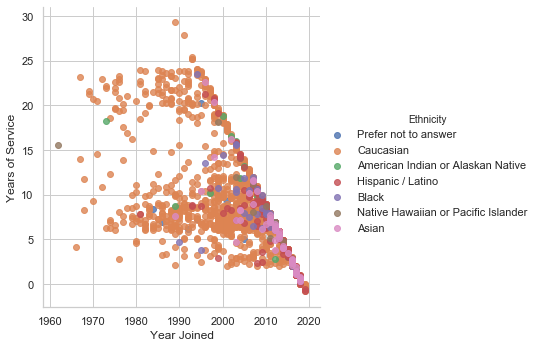

In [242]:
TimePeriodChange('YrSvc', 'Years of Service', 'Ethnicity')

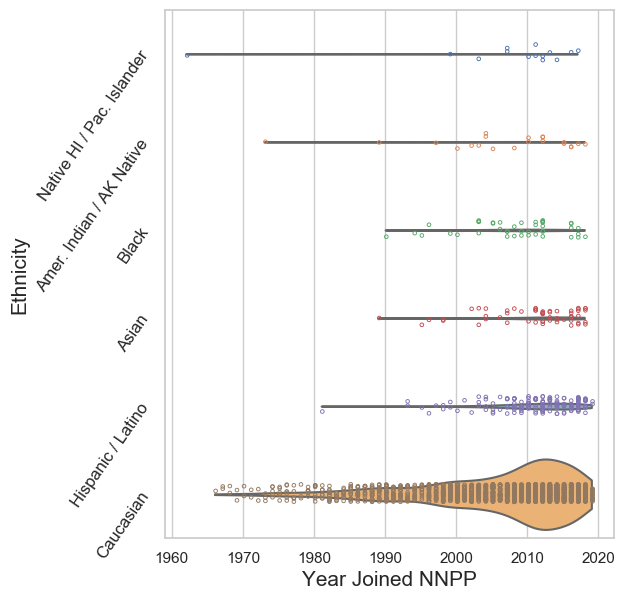

In [243]:
figsize=(5.8,7)
dpi=100
plt.figure(figsize=figsize, dpi=dpi)
sns.set(style="whitegrid")
order=["Native Hawaiian or Pacific Islander", "American Indian or Alaskan Native", "Black", "Asian", "Hispanic / Latino", "Caucasian" ]
labels= ["Native HI / Pac. Islander", "Amer. Indian / AK Native", "Black", "Asian",    "Hispanic / Latino", "Caucasian" ]
ax = sns.violinplot(x='Year_Joined', y='Ethnicity', order=order,
                     data=df, scale="count", palette="Set3", cut = 0, inner=None) 
ax = sns.stripplot(x='Year_Joined', y='Ethnicity', order=order,
                     data=df, marker="$\circ$", size=5)
ax.set_xlabel('Year Joined NNPP',fontsize=15)
ax.set_ylabel('Ethnicity',fontsize=15)
ax.set_yticklabels(labels=labels, rotation=55, fontsize=12)
plt.show()

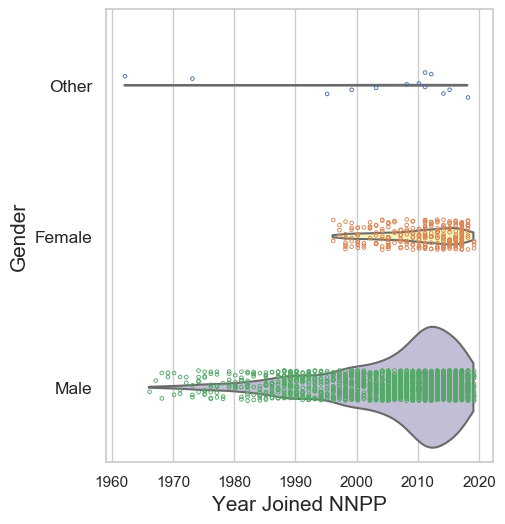

<Figure size 500x600 with 0 Axes>

In [244]:
figsize=(5,6)
dpi=100
plt.figure(figsize=figsize, dpi=dpi)
sns.set(style="whitegrid")
ax = sns.violinplot(x='Year_Joined', y='Gender', order=["Other", "Female", "Male"],
                     data=df, scale="count", palette="Set3", cut = 0, inner=None) 
ax = sns.stripplot(x='Year_Joined', y='Gender', order=["Other", "Female", "Male"],
                     data=df, marker="$\circ$", size=5)
ax.set_xlabel('Year Joined NNPP',fontsize=15)
ax.set_ylabel('Gender',fontsize=15)
ax.set_yticklabels(labels=["Other", "Female", "Male"], fontsize=12.5)
plt.figure(figsize=figsize, dpi=dpi)
plt.show()

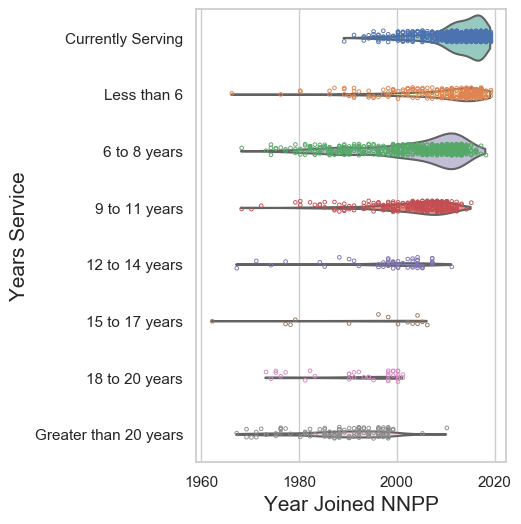

In [387]:
figsize=(4,6)
dpi=100
plt.figure(figsize=figsize, dpi=dpi)
order = ['Currently Serving', 'Less than 6', '6 to 8 years', '9 to 11 years', '12 to 14 years',
        '15 to 17 years', '18 to 20 years', 'Greater than 20 years']
sns.set(style="whitegrid")
ax = sns.violinplot(x='Year_Joined', y='Years_Service', order = order,
                     data=df, scale="count", palette="Set3", cut = 0, inner=None) 
ax = sns.stripplot(x='Year_Joined', y='Years_Service', order = order,
                     data=df, marker="$\circ$", size=5)
ax.set_xlabel('Year Joined NNPP',fontsize=15)
ax.set_ylabel('Years Service',fontsize=15)
plt.show()

In [422]:
import math

# create dictionaries to add all the different counts for active duty members based on their ethnicity
df.Ethnicity = df.Ethnicity.replace(np.nan, '', regex=True)  #replace nan with a string to prevent errors
ethnicity=["Native Hawaiian or Pacific Islander", "American Indian or Alaskan Native", "Black", "Asian", "Hispanic / Latino", "Caucasian" ]
nh = {}
ai = {}
bl = {}
an = {}
hl = {}
ca = {}

#for each member adds counts based on years service to appropriate ethnicity
def add_eth(dicti, yrjoined, yrsrvce):
    for x in range(int(yrsrvce+2)):
        yr = yrjoined + x 
        if dicti.get(yr) is None:
            dicti[yr] = 1
        else:
            dicti[yr] += 1
    return

#determines ethnicity and directs to function above
def ch_eth(row):
    e = row.Ethnicity
    j = row.Year_Joined
    s = row.YrSvc
    if math.isnan(s) or math.isnan(j):  #if nan values in these columns than just skips
        return
    elif ethnicity[0] in e:
        add_eth(nh, j, s)
        return 
    elif ethnicity[1] in e:
        add_eth(ai, j, s)
        return 
    elif ethnicity[2] in e:
        add_eth(bl, j, s)
        return 
    elif ethnicity[3] in e:
        add_eth(an, j, s)
        return 
    elif ethnicity[4] in e:
        add_eth(hl, j, s)
        return 
    elif ethnicity[5] in e:
        add_eth(ca, j, s)
        return 
    else: return

#starts the iteration for assigning counts
for index, row in df.iterrows():
    ch_eth(row)

#collects all the dictionaries, puts in a dataframe
all= [nh, ai, bl, an, hl, ca]
e = pd.DataFrame(all) #puts dictionaries in dataframe
e = e.transpose() #shifts from a wide to long data set
headers = ["HI_PI", "AI_AK", "Black", "Asian", "H_L", "Cauc" ]
e.columns = headers #assigns headers
e.sort_index(inplace=True) #sorts based on the index
e.fillna(0, inplace=True) #fills NaN values with 0

#adds a total column
def add_col(row):
    count = 0
    for header in headers:
        count += row[header]
    return count

e['Tot'] = e.apply(lambda row: add_col(row), axis=1)
e.tail(10)

,HI_PI,AI_AK,Black,Asian,H_L,Cauc,Tot
2010.0,5.0,9.0,22.0,15.0,51.0,669.0,771.0
2011.0,7.0,9.0,23.0,20.0,58.0,764.0,881.0
2012.0,9.0,12.0,31.0,29.0,73.0,852.0,1006.0
2013.0,10.0,12.0,30.0,29.0,81.0,941.0,1103.0
2014.0,11.0,12.0,30.0,32.0,94.0,987.0,1166.0
2015.0,11.0,14.0,27.0,33.0,100.0,1024.0,1209.0
2016.0,11.0,15.0,29.0,40.0,108.0,1061.0,1264.0
2017.0,11.0,16.0,29.0,45.0,125.0,1133.0,1359.0
2018.0,10.0,16.0,28.0,47.0,130.0,1158.0,1389.0
2019.0,9.0,15.0,24.0,42.0,121.0,1093.0,1304.0


In [390]:
per_e = pd.DataFrame(index=e.index)
headers = ["HI_PI", "AI_AK", "Black", "Asian", "H_L", "Cauc" ]

for header in headers:
    per_e[header] = e[header]/e['Tot']

per_e.columns = ["Native Hawaiian / Pacific Islander", "American Indian / Alaskan Native", "Black", "Asian", "Hispanic / Latino", "Caucasian" ]
per_e.tail(10)

,Native Hawaiian / Pacific Islander,American Indian / Alaskan Native,Black,Asian,Hispanic / Latino,Caucasian
2010.0,0.006485,0.011673,0.028534,0.019455,0.066148,0.867704
2011.0,0.007946,0.010216,0.026107,0.022701,0.065834,0.867196
2012.0,0.008946,0.011928,0.030815,0.028827,0.072565,0.846918
2013.0,0.009066,0.010879,0.027199,0.026292,0.073436,0.853128
2014.0,0.009434,0.010292,0.025729,0.027444,0.080617,0.846484
2015.0,0.009098,0.011580,0.022333,0.027295,0.082713,0.846981
2016.0,0.008703,0.011867,0.022943,0.031646,0.085443,0.839399
2017.0,0.008094,0.011773,0.021339,0.033113,0.091979,0.833701
2018.0,0.007199,0.011519,0.020158,0.033837,0.093593,0.833693
2019.0,0.006902,0.011503,0.018405,0.032209,0.092791,0.838190


Text(0, 0.5, 'Percent Ethnicity while Actively Serving in NNPP')

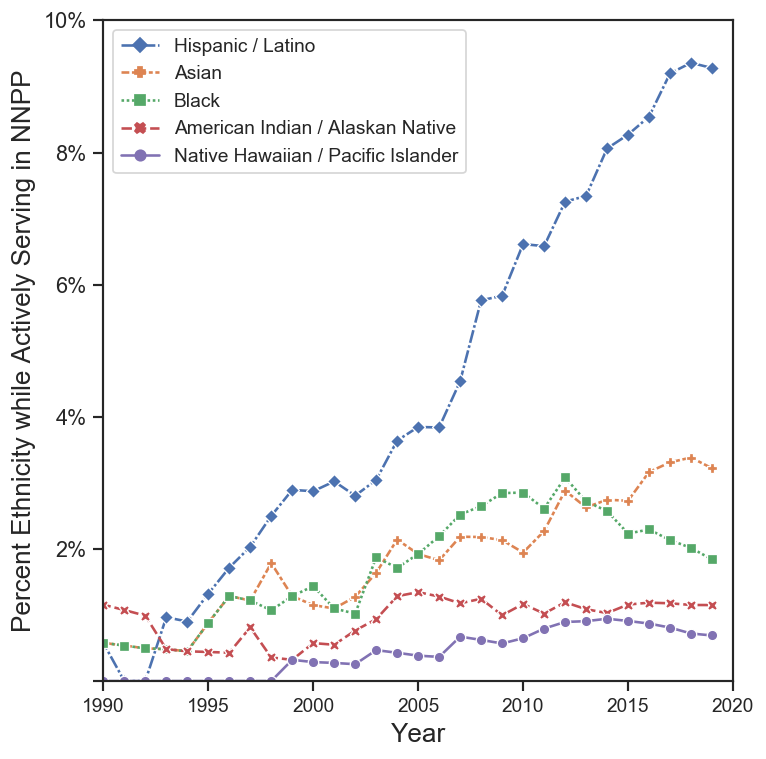

In [406]:
figsize=(6.5,7)
dpi=125
plt.figure(figsize=figsize, dpi=dpi)
sns.set_style("ticks")
ax = sns.lineplot(data = per_e[["Native Hawaiian / Pacific Islander", "American Indian / Alaskan Native", "Black", "Asian", "Hispanic / Latino"]], markers=True,
                 hue_order = ["Hispanic / Latino", "Asian", "Black", "American Indian / Alaskan Native", "Native Hawaiian / Pacific Islander"])
ax.set_xlim(1990,2020)
ax.set_ylim(0, .10)
ax.set_yticklabels(labels=["", "2%", "4%", "6%", "8%", "10%"], fontsize=12.5)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Percent Ethnicity while Actively Serving in NNPP',fontsize=15)


In [413]:
# create dictionaries to add all the different counts for active duty members based on their gender
df.Gender.fillna('', inplace=True) #replace nan with a string to prevent errors
gender=["Female", "Male", "Other"]
f = {}
m = {}
o = {}

#for each member adds counts based on years service to appropriate egender
def add_gen(dicti, yrjoined, yrsrvce):
    for x in range(int(yrsrvce+2)):
        yr = yrjoined + x 
        if dicti.get(yr) is None:
            dicti[yr] = 1
        else:
            dicti[yr] += 1
    return

#determines ethnicity and directs to function above
def ch_gen(row):
    e = row.Gender
    j = row.Year_Joined
    s = row.YrSvc
    if math.isnan(s) or math.isnan(j):  #if nan values in these columns than just skips
        return
    elif gender[0] in e:
        add_gen(f, j, s)
        return 
    elif gender[1] in e:
        add_eth(m, j, s)
        return 
    elif gender[2] in e:
        add_eth(o, j, s)
        return 
    else: return

#starts the iteration for assigning counts
for index, row in df.iterrows():
    ch_gen(row)

#collects all the dictionaries, puts in a dataframe
all= [f, m, o]
g = pd.DataFrame(all) #puts dictionaries in dataframe
g = g.transpose() #shifts from a wide to long data set
headers = ["Female", "Male", "Other"]
g.columns = headers #assigns headers
g.sort_index(inplace=True) #sorts based on the index
g.fillna(0, inplace=True) #fills NaN values with 0

#adds a total column
def add_col(row):
    count = 0
    for header in headers:
        count += row[header]
    return count

g['Tot'] = g.apply(lambda row: add_col(row), axis=1)
g.tail(10)

,Female,Male,Other,Tot
2010.0,88.0,694.0,3.0,785.0
2011.0,99.0,789.0,4.0,892.0
2012.0,111.0,901.0,5.0,1017.0
2013.0,114.0,994.0,5.0,1113.0
2014.0,125.0,1044.0,6.0,1175.0
2015.0,137.0,1072.0,7.0,1216.0
2016.0,149.0,1118.0,6.0,1273.0
2017.0,173.0,1188.0,6.0,1367.0
2018.0,173.0,1219.0,7.0,1399.0
2019.0,166.0,1142.0,4.0,1312.0


In [426]:
per_g = pd.DataFrame(index=g.index)

headers = ["Female", "Male", "Other"]
for header in headers:
    per_g[header] = g[header]/g['Tot']

per_g.tail(10)

,Female,Male,Other
2010.0,0.112102,0.884076,0.003822
2011.0,0.110987,0.884529,0.004484
2012.0,0.109145,0.885939,0.004916
2013.0,0.102426,0.893082,0.004492
2014.0,0.106383,0.888511,0.005106
2015.0,0.112664,0.881579,0.005757
2016.0,0.117046,0.878240,0.004713
2017.0,0.126554,0.869056,0.004389
2018.0,0.123660,0.871337,0.005004
2019.0,0.126524,0.870427,0.003049


Text(0, 0.5, 'Percent Gender while Actively Serving in NNPP')

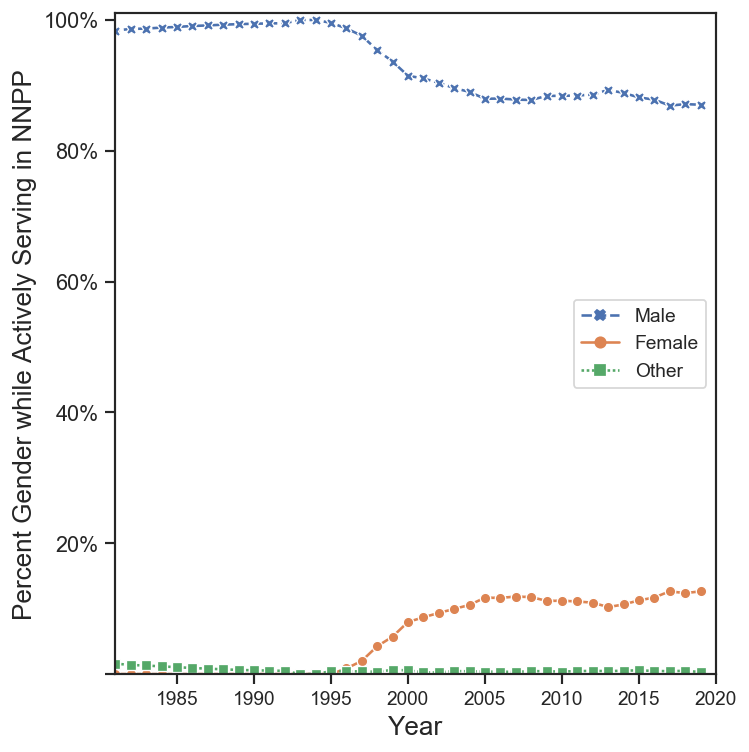

In [420]:
figsize=(6.2,7)
dpi=125
plt.figure(figsize=figsize, dpi=dpi)
sns.set_style("ticks")
ax = sns.lineplot(data = per_g, markers=True,
                 hue_order = ["Male", "Female", "Other"])
ax.set_xlim(1981,2020)
ax.set_ylim(0, 1.01)
ax.set_yticklabels(labels=["", "20%", "40%", "60%", "80%", "100%"], fontsize=12.5)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Percent Gender while Actively Serving in NNPP',fontsize=15)

In [438]:
# create dictionaries to add all the different counts for active duty members based on their gender
df.Years_Service.fillna('', inplace=True) #replace nan with a string to prevent errors
service=['Currently Serving', 'Less than 6', '6 to 8 years', '9 to 11 years', '12 to 14 years',
        '15 to 17 years', '18 to 20 years', 'Greater than 20 years']
cs = {}
six = {}
seven = {}
ten = {}
thirteen = {}
sixteen = {}
nineteen = {}
twenty = {}

#for each member adds counts based on years service to appropriate service
def add_ser(dicti, yrjoined, yrsrvce):
    for x in range(int(yrsrvce+2)):
        yr = yrjoined + x 
        if dicti.get(yr) is None:
            dicti[yr] = 1
        else:
            dicti[yr] += 1
    return

#determines service and directs to function above
def ch_ser(row):
    e = row.Years_Service
    j = row.Year_Joined
    s = row.YrSvc
    if math.isnan(s) or math.isnan(j):  #if nan values in these columns than just skips
        return
    elif service[0] in e:
        add_ser(cs, j, s)
        return 
    elif service[1] in e:
        add_ser(six, j, s)
        return 
    elif service[2] in e:
        add_ser(seven, j, s)
        return
    elif service[3] in e:
        add_ser(ten, j, s)
        return 
    elif service[4] in e:
        add_ser(thirteen, j, s)
        return 
    elif service[5] in e:
        add_ser(sixteen, j, s)
        return 
    elif service[6] in e:
        add_ser(nineteen, j, s)
        return 
    elif service[7] in e:
        add_ser(twenty, j, s)
        return 
    else: return

#starts the iteration for assigning counts
for index, row in df.iterrows():
    ch_ser(row)

#collects all the dictionaries, puts in a dataframe
all= [six, seven, ten, thirteen, sixteen, nineteen, twenty]
s = pd.DataFrame(all) #puts dictionaries in dataframe
s = s.transpose() #shifts from a wide to long data set
headers = ['Less than 6', '6 to 8 years', '9 to 11 years', '12 to 14 years', '15 to 17 years', '18 to 20 years', 'Greater than 20 years']
s.columns = headers #assigns headers
s.sort_index(inplace=True) #sorts based on the index
s.fillna(0, inplace=True) #fills NaN values with 0

#adds a total column
def add_col(row):
    count = 0
    for header in headers:
        count += row[header]
    return count

s['Tot'] = s.apply(lambda row: add_col(row), axis=1)
s.tail(100)

,Less than 6,6 to 8 years,9 to 11 years,12 to 14 years,15 to 17 years,18 to 20 years,Greater than 20 years,Tot
1962.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1963.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1964.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1965.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1966.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1967.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0
1968.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0
1969.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,8.0
1970.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,10.0
1971.0,0.0,1.0,2.0,2.0,1.0,0.0,6.0,12.0


In [437]:
per_s = pd.DataFrame(index=s.index)

headers = ['Less than 6', '6 to 8 years', '9 to 11 years', '12 to 14 years', '15 to 17 years', '18 to 20 years', 'Greater than 20 years']
for header in headers:
    per_s[header] = s[header]/s['Tot']

per_s.tail(100)

,Less than 6,6 to 8 years,9 to 11 years,12 to 14 years,15 to 17 years,18 to 20 years,Greater than 20 years
1962.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1963.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1964.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1965.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1966.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
1967.0,0.250000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000
1968.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667
1969.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.000000,0.375000
1970.0,0.100000,0.100000,0.200000,0.100000,0.100000,0.000000,0.400000
1971.0,0.000000,0.083333,0.166667,0.166667,0.083333,0.000000,0.500000


Text(0, 0.5, 'Percent Service for Those Previously Serving in NNPP')

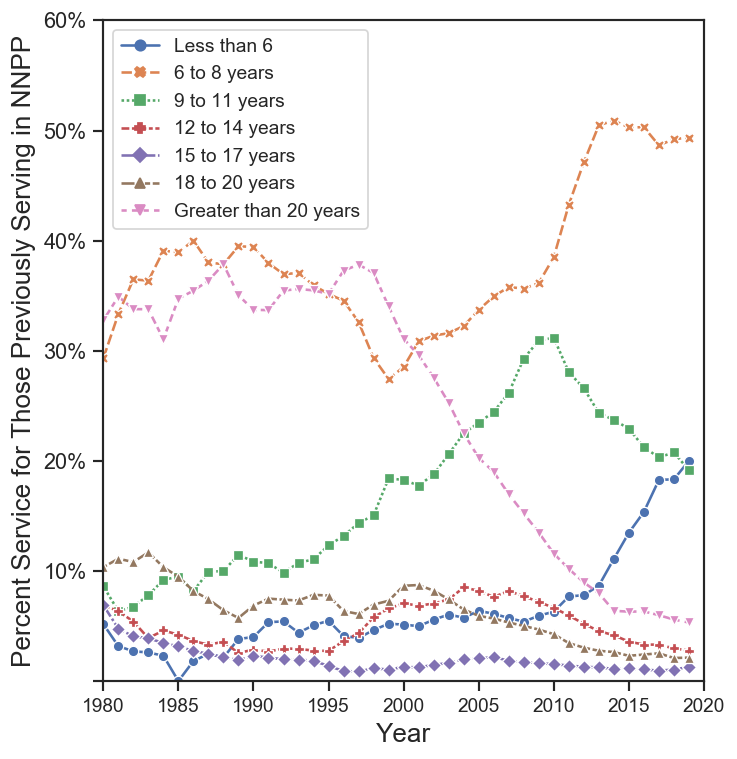

In [439]:
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]
figsize=(6.2,7)
dpi=125
plt.figure(figsize=figsize, dpi=dpi)
sns.set_style("ticks")
ax = sns.lineplot(data = per_s, dashes=dash_styles, markers=True, hue_order = headers)
ax.set_xlim(1980,2020)
ax.set_ylim(0, .6)
ax.set_yticklabels(labels=["", "10%", "20%", "30%", "40%", "50%", "60%"], fontsize=12.5)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Percent Service for Those Previously Serving in NNPP',fontsize=15)